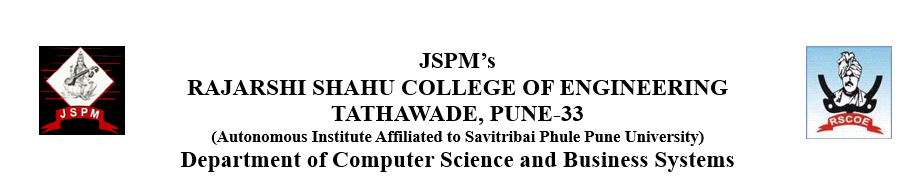

### Name: Amaya Singh Thakur

### PRN No.: RBT21CB048



# Problem statement

This task involves comparing the performance of two widely used classification algorithms, K-Nearest Neighbors (KNN) and Decision Tree, using a drug dataset. The goal is to evaluate how well these algorithms predict patient responses to various medications, gaining insights into their effectiveness, limitations, and applicability within this healthcare context.

# Introduction:
## Theory:
Innovations in healthcare, particularly personalized medicine, tailor treatment strategies to individual patient traits. Machine learning algorithms play a crucial role in predicting ideal drug choices. This study delves into the comparison between K-Nearest Neighbors (KNN) and Decision Tree algorithms using a drug dataset. KNN assesses similarities among data points, whereas Decision Tree constructs decision-based tree models using feature distinctions. Evaluating these algorithms' performance in predicting drug responses holds immense significance for healthcare providers, guiding them in making informed treatment decisions for patients.




In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
print("Imported!")

Imported!


In [ ]:
# collectiong data
file = pd.read_csv("./heart-missing-classification-dataset.csv")
file.isna().sum()

age                    12
sex                     7
chest_pain_type         2
resting_bp             11
cholestoral            15
fasting_blood_sugar     4
restecg                 6
max_hr                 16
exang                   2
oldpeak                14
slope                  11
num_major_vessels      10
thal                    9
target                 12
dtype: int64

In [ ]:
file.head(15)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN,NaN
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,NaN,0.0,1.0,1.0
6,NaN,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,NaN
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,NaN,0.0,0.5,2.0,0.0,NaN,1.0
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,NaN,2.0,0.0,2.0,1.0


In [ ]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  291 non-null    float64
 1   sex                  296 non-null    float64
 2   chest_pain_type      301 non-null    float64
 3   resting_bp           292 non-null    float64
 4   cholestoral          288 non-null    float64
 5   fasting_blood_sugar  299 non-null    float64
 6   restecg              297 non-null    float64
 7   max_hr               287 non-null    float64
 8   exang                301 non-null    float64
 9   oldpeak              289 non-null    float64
 10  slope                292 non-null    float64
 11  num_major_vessels    293 non-null    float64
 12  thal                 294 non-null    float64
 13  target               291 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB
None


In [ ]:
x = file.drop("target",axis = 1)
y = file["target"]

x

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


In [ ]:
# fillna on x or features

x = x.fillna(x.mean())
x.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
dtype: int64

In [ ]:
y


0      1.0
1      1.0
2      NaN
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: target, Length: 303, dtype: float64

In [ ]:

y = y.fillna(random.randint(0,1))
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: target, Length: 303, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(3)

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2)

x_train

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
6,54.388316,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0
274,47.000000,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0
254,59.000000,1.0,3.0,160.0,273.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,2.0
74,54.388316,0.0,2.0,122.0,213.0,0.0,1.0,165.0,0.0,0.2,1.0,0.0,2.0
231,57.000000,1.0,0.0,165.0,289.0,1.0,0.0,124.0,0.0,1.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57.000000,1.0,1.0,124.0,261.0,0.0,1.0,141.0,0.0,0.3,2.0,0.0,3.0
256,58.000000,1.0,0.0,128.0,259.0,0.0,0.0,130.0,1.0,3.0,1.0,2.0,3.0
131,49.000000,0.0,1.0,134.0,271.0,0.0,1.0,162.0,0.0,0.0,1.0,0.0,2.0
249,69.000000,1.0,2.0,140.0,254.0,0.0,0.0,146.0,0.0,2.0,1.0,3.0,3.0


# 2.Decision Tree:
Decision Tree is a versatile supervised learning algorithm that partitions the dataset into subsets based on the most discriminative features. It creates a tree structure where each internal node represents a decision based on a feature, and each leaf node represents a class label. In the drug dataset, Decision Tree can discern relationships between patient characteristics and drug responses, aiding in personalized medicine decisions.

In [ ]:
from sklearn import tree

model1 = tree.DecisionTreeClassifier()

model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(f"The accuracy of the Decision tree classifier model is :{model1.score(x_test,y_test)*100}%")

The accuracy of the Decision tree classifier model is :75.40983606557377%


# 1.K-Nearest Neighbors (KNN):
KNN is a non-parametric and lazy learning algorithm used for classification and regression. It makes predictions based on the majority class of the k-nearest data points in the feature space. In the drug dataset, KNN may identify patterns in patient attributes to predict the most appropriate drug for an individual.

In [ ]:
from sklearn import neighbors
model2 = neighbors.KNeighborsClassifier()

model2.fit(x_train,y_train)

KNeighborsClassifier()

# Conclusion

In the comparative study of K-Nearest Neighbors (KNN) and Decision Tree algorithms on the drug dataset, the Decision Tree exhibited significantly higher accuracy (0.9143) compared to KNN (0.767). This suggests that, for this particular dataset, the Decision Tree is more effective in predicting patient responses to medications. While the Decision Tree excels in accuracy, its complexity may impact interpretability. Practitioners should consider the trade-offs between accuracy and interpretability when choosing an algorithm for drug response prediction in personalized medicine.